### Import packages

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt

In this lab, we will review:

1. Plotting
2. Recoding
3. Correlation

### Reads files

In [2]:
df = pd.read_csv('clean_property_data.csv')
df.head()

,Unnamed: 0,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,...,pcnt_indu,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi
0,0,40003,60000.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0.0,0.00,0.49,0.0,1.74,39.92,0,0,11.00210,0
1,1,40007,140000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0.0,15.41,1.32,0.0,0.54,46.00,1,0,11.84940,1
2,2,40008,38000.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,0.0,8.16,5.57,0.0,1.55,45.87,0,0,10.54534,0
3,3,40010,110000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0.0,8.11,5.53,0.0,1.58,45.88,1,0,11.60824,1
4,4,40011,120000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0.0,0.00,0.00,0.0,0.40,46.00,1,0,11.69525,1


In [3]:
len(df)

3976

In [4]:
var = df['price_000']

q_75 = np.quantile(var, 0.75)
q_25 = np.quantile(var, 0.25)
q_50 = np.quantile(var, 0.5) ### this is also the median

iqr_calc = q_75 - q_25 ### this should give the same output as the function scipy.stats.iqr()

# if we want to drop the outliers
df_new = df[(var > (q_25 - 1.5 * iqr_calc))&(var < (q_75 + 1.5 * iqr_calc))]

len(df_new)

3693

## Recoding

##### Creating dummy SES variable

In [5]:
# Counts
df.groupby('ses').size()

ses
1.0      26
2.0      79
3.0    2105
4.0    1448
5.0     227
6.0      91
dtype: int64

In [6]:
df['ses'].value_counts()

3.0    2105
4.0    1448
5.0     227
6.0      91
2.0      79
1.0      26
Name: ses, dtype: int64

In [7]:
# Creating the dummy
df['ses_dummy'] = np.where((df['ses'] == 5) | (df['ses'] == 6), 1, 0)

In [8]:
df_dummy = df.loc[(df['ses'] == 5) | (df['ses'] == 6)]
df_dummy.head()

,Unnamed: 0,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,...,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi,ses_dummy
10,10,40017,60000.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,0.00,0.36,0.0,0.52,46.00,0,1,11.00210,0,1
146,146,40641,135000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0.00,1.49,0.0,1.09,34.38,1,1,11.81303,1,1
150,150,40676,120000.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,0.15,0.07,0.0,0.77,46.00,0,1,11.69525,1,1
168,168,40742,58000.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,0.00,0.00,0.0,0.89,46.00,0,1,10.96820,0,1
170,170,40745,93500.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,12.69,4.30,0.0,1.18,46.00,0,1,11.44572,0,1


In [9]:
len(df_dummy)

318

In [10]:
df[['ses', 'ses_dummy']]

,ses,ses_dummy
0,4.0,0
1,4.0,0
2,4.0,0
3,4.0,0
4,4.0,0
...,...,...
3971,6.0,1
3972,6.0,1
3973,3.0,0
3974,6.0,1


In [11]:
# alternatively, use .loc
df['ses_dummy'] = 0 # create dummy varaible
df.loc[((df['ses'] == 5) | (df['ses'] == 6)),'ses_dummy']=1
df

,Unnamed: 0,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,...,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi,ses_dummy
0,0,40003,60000.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0.00,0.49,0.00,1.74,39.92,0,0,11.00210,0,0
1,1,40007,140000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,15.41,1.32,0.00,0.54,46.00,1,0,11.84940,1,0
2,2,40008,38000.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,8.16,5.57,0.00,1.55,45.87,0,0,10.54534,0,0
3,3,40010,110000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,8.11,5.53,0.00,1.58,45.88,1,0,11.60824,1,0
4,4,40011,120000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0.00,0.00,0.00,0.40,46.00,1,0,11.69525,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,3971,523102,480000.0,0.0,0.0,0.0,0.0,1.0,0.0,1,...,0.00,0.00,32.57,1.02,234.00,0,1,13.08154,1,1
3972,3972,523244,500000.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0.00,0.00,32.57,1.02,234.00,0,1,13.12236,1,1
3973,3973,523709,564425.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0.00,0.26,1.01,0.06,234.00,0,0,13.24356,1,0
3974,3974,524274,699800.0,0.0,0.0,0.0,1.0,0.0,0.0,1,...,0.00,0.84,20.45,1.90,234.00,0,1,13.45855,1,1


In [12]:
### Data check!
df.groupby('ses_dummy').size()

ses_dummy
0    3658
1     318
dtype: int64

##### Create binary density variable

In [13]:
### Compute median
pop_dens_med = np.median(df['pop_dens'])
pop_dens_med

416.32000000000005

In [14]:
### Creating the dummy
df['pop_dens_dummy'] = np.where((df['pop_dens']>= pop_dens_med), 1, 0)

In [15]:
### Data check!
df.groupby('pop_dens_dummy').size()

pop_dens_dummy
0    1988
1    1988
dtype: int64

##### Recode the number of bathrooms variable

In [16]:
### Counts
df.groupby('num_bath').size()

num_bath
1.0    1021
2.0    1776
3.0     623
4.0     444
5.0     112
dtype: int64

In [17]:
### Creating the dummy
df['num_bath_cat'] = np.where((df['num_bath']>= 3), 3, df['num_bath'])

In [18]:
df.groupby('num_bath_cat').size()

num_bath_cat
1.0    1021
2.0    1776
3.0    1179
dtype: int64

##### Standardizing the Area variable

<img src = 'standarization.jpg' width = 500>
source: https://365datascience.com/standardization/

In [19]:
### Describe the data
df['area_m2'].describe()

count    3976.000000
mean      121.662726
std        86.126627
min        22.000000
25%        62.000000
50%        86.000000
75%       151.000000
max       450.000000
Name: area_m2, dtype: float64

In [20]:
x = df['area_m2']

area_mean = np.mean(x)
area_SD = np.std(x) 

print('area mean:', round(area_mean, 2))
print('area SD:', round(area_SD, 2))

area mean: 121.66
area SD: 86.12


In [21]:
df['area_stand'] = (df['area_m2']- area_mean)/area_SD

In [22]:
df['area_stand'].describe()

count    3.976000e+03
mean     1.429663e-17
std      1.000126e+00
min     -1.157311e+00
25%     -6.928198e-01
50%     -4.141253e-01
75%      3.406724e-01
max      3.812742e+00
Name: area_stand, dtype: float64

In [23]:
x = df['area_stand']

area_std_mean = np.mean(x)
area_std_SD = np.std(x) 

print('area mean:', round(area_std_mean, 2))
print('area SD:', round(area_std_SD, 2))

area mean: 0.0
area SD: 1.0


##### Compare area histograms

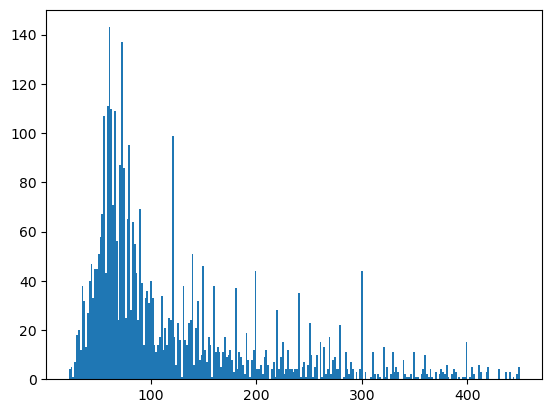

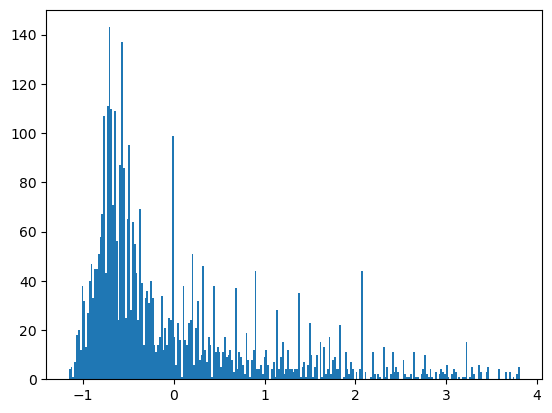

In [24]:
### Area vs standardized area
plt.hist(df['area_m2'], 250)
plt.show()

plt.hist(df['area_stand'], 250)
plt.show()

##### Compare density histograms

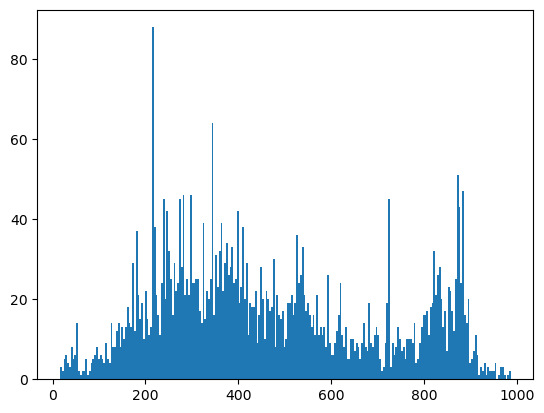

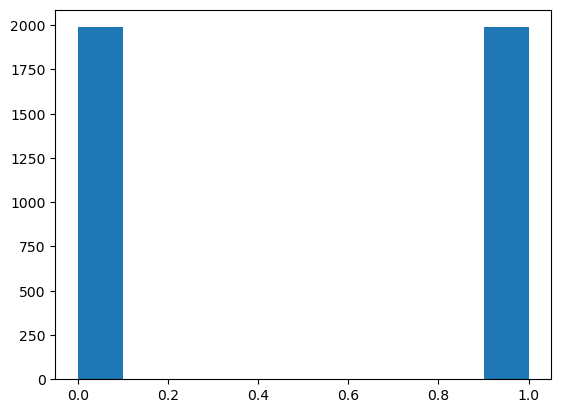

In [25]:
### Population density vs Population density dummy
plt.hist(df['pop_dens'], 250)
plt.show()

plt.hist(df['pop_dens_dummy'])
plt.show()

## Scatterplots

##### Scatterplot price vs SES (6 categories)

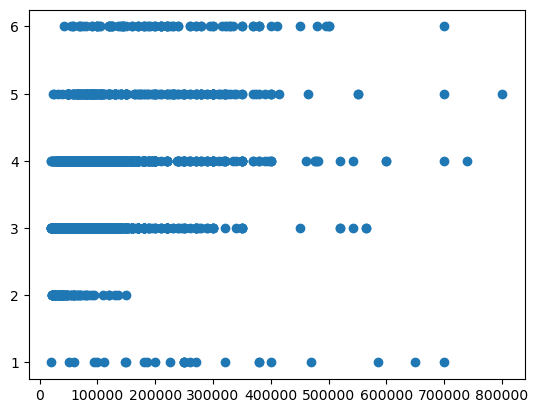

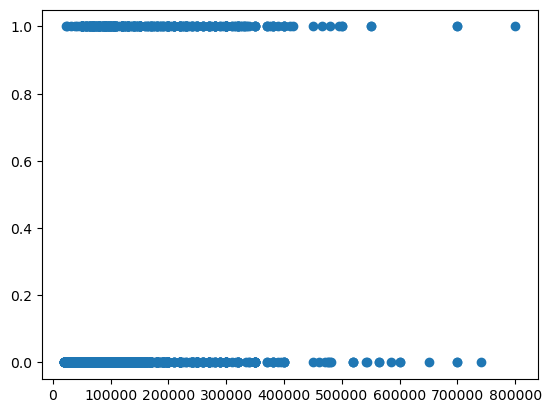

In [26]:
### Price vs SES & price vs SES categories
x = df['price_000']
y1 = df['ses']
y2 = df['ses_dummy']

plt.scatter(x, y1)
plt.show()

plt.scatter(x, y2)
plt.show()

### Two continuous variables

In [27]:
df.columns

Index(['Unnamed: 0', 'id', 'price_000', 'yr_2001', 'yr_2002', 'yr_2003',
       'yr_2004', 'yr_2005', 'yr_2006', 'apt', 'floor', 'age_0_10',
       'age_10_20', 'age_20_more', 'num_room', 'num_bath', 'num_garage',
       'area_m2', 'ses', 'pop_dens', 'pcnt_indu', 'pcnt_com', 'pcnt_insti',
       'pcnt_vacant', 'pcn_green', 'homicides', 'house', 'ses_bin', 'lnprice',
       'price_hi', 'ses_dummy', 'pop_dens_dummy', 'num_bath_cat',
       'area_stand'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

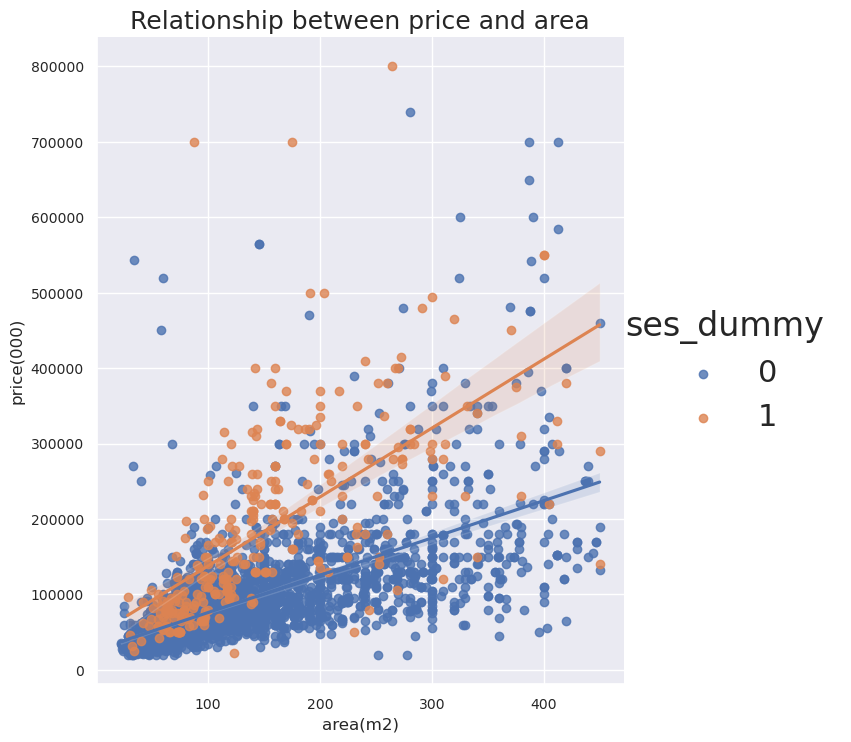

In [28]:
# we could also plot using seaborn
import seaborn as sns

plt.figure(figsize=(12,8))

sns.set(font_scale=2) # set font size
sns.lmplot(x='area_m2', y='price_000', hue='ses_dummy', data=df, height = 8);
plt.xlabel('area(m2)', fontsize = 12)
plt.ylabel('price(000)', fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Relationship between price and area', fontsize = 18);

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

## Pearson Correlation

In [29]:
# Create pairwise correlation matrix
df.corr() # default method is Pearson correlation

,Unnamed: 0,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,...,pcn_green,homicides,house,ses_bin,lnprice,price_hi,ses_dummy,pop_dens_dummy,num_bath_cat,area_stand
Unnamed: 0,1.000000,0.386400,-0.015645,-0.121749,-0.150306,-0.141724,0.045788,0.190388,0.140564,0.104685,...,0.366043,0.576071,-0.104685,0.018708,-0.048049,-0.052131,0.018708,-0.034262,0.053472,-0.129908
id,0.386400,1.000000,0.015957,-0.085824,-0.329288,-0.286856,0.111281,0.297611,0.222621,0.359261,...,0.105604,-0.049071,-0.359261,0.107757,-0.021365,-0.054410,0.107757,-0.239023,-0.085515,-0.174743
price_000,-0.015645,0.015957,1.000000,-0.020143,-0.017800,0.016423,-0.006333,0.008322,0.019476,-0.272182,...,-0.024504,-0.140996,0.272182,0.357845,0.896713,0.716958,0.357845,-0.006033,0.407136,0.632867
yr_2001,-0.121749,-0.085824,-0.020143,1.000000,-0.155667,-0.172806,-0.234525,-0.208736,-0.155312,-0.051076,...,-0.066295,-0.004136,0.051076,0.014096,-0.014993,-0.005717,0.014096,0.009323,0.061126,0.046500
yr_2002,-0.150306,-0.329288,-0.017800,-0.155667,1.000000,-0.160412,-0.217704,-0.193765,-0.144172,-0.091675,...,-0.031057,-0.005379,0.091675,0.002373,-0.018804,-0.008073,0.002373,0.118129,0.117289,0.047662
yr_2003,-0.141724,-0.286856,0.016423,-0.172806,-0.160412,1.000000,-0.241674,-0.215099,-0.160046,-0.105988,...,-0.062284,-0.036070,0.105988,-0.007941,0.023529,0.020472,-0.007941,0.048448,-0.058496,0.080717
yr_2004,0.045788,0.111281,-0.006333,-0.234525,-0.217704,-0.241674,1.000000,-0.291923,-0.217208,0.004512,...,0.024921,-0.009586,-0.004512,-0.005461,-0.004562,0.003131,-0.005461,0.002333,-0.031424,0.014372
yr_2005,0.190388,0.297611,0.008322,-0.208736,-0.193765,-0.215099,-0.291923,1.000000,-0.193323,0.123877,...,0.070784,0.033238,-0.123877,-0.017378,-0.011981,-0.023868,-0.017378,-0.090756,-0.033965,-0.087158
yr_2006,0.140564,0.222621,0.019476,-0.155312,-0.144172,-0.160046,-0.217208,-0.193323,1.000000,0.103324,...,0.049726,0.020638,-0.103324,0.019602,0.029829,0.017070,0.019602,-0.072819,-0.036629,-0.096463
apt,0.104685,0.359261,-0.272182,-0.051076,-0.091675,-0.105988,0.004512,0.123877,0.103324,1.000000,...,0.071164,-0.002256,-1.000000,0.100795,-0.384840,-0.374438,0.100795,-0.146242,-0.337229,-0.651771


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

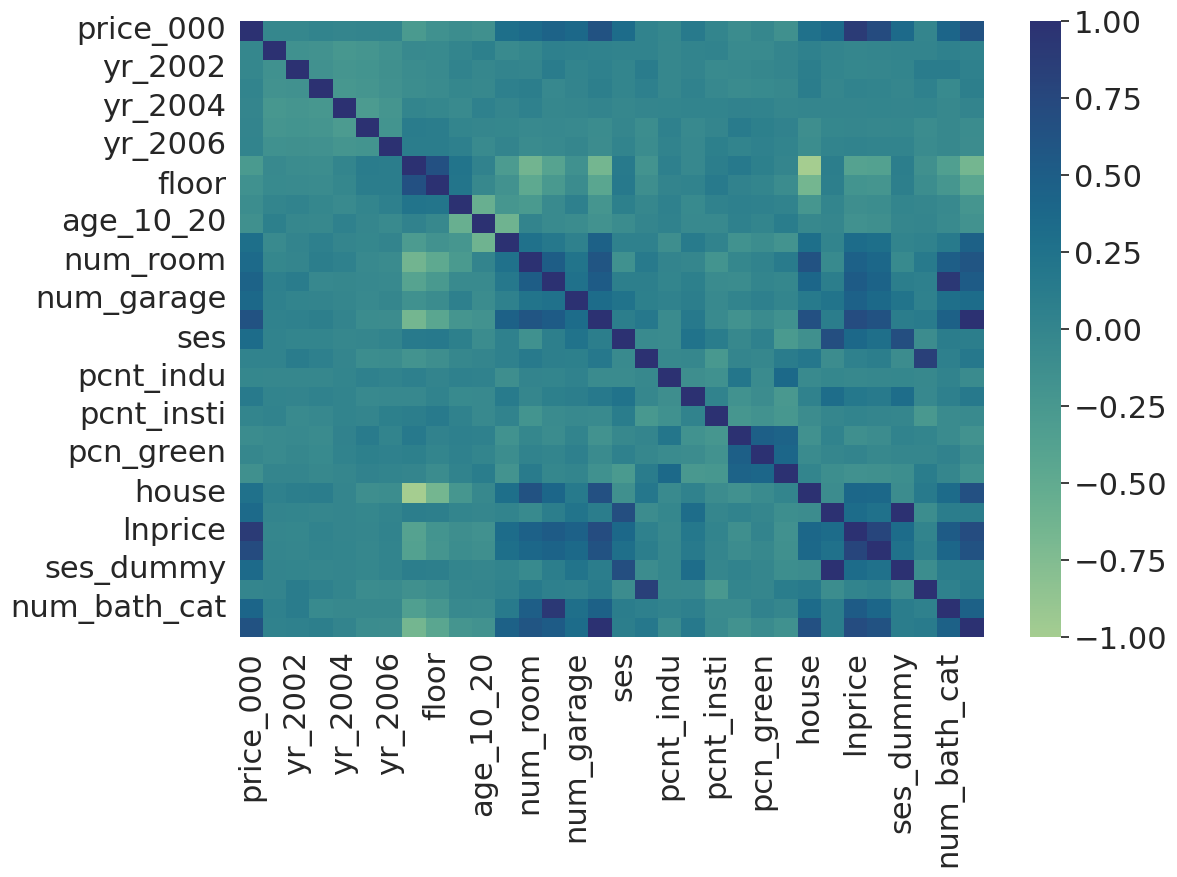

In [30]:
# Create correlation heatmap
plt.figure(figsize=(12,8)) 
sns.heatmap(df.drop(['Unnamed: 0', 'id'], axis = 1).corr(), cmap="crest");

https://seaborn.pydata.org/generated/seaborn.heatmap.html